# pyUserCalc: A revised Jupyter notebook calculator for uranium-series disequilibria in basalts

Lynne J. Elkins$^{1}$, Marc Spiegelman$^{2}$

$^{1}$ University of Nebraska-Lincoln, Lincoln, NE, USA, lelkins@unl.edu
$^{2}$ Lamont-Doherty Earth Observatory of Columbia University, Palisades, NY, USA, mspieg@ldeo.columbia.edu

- Cloud-based Jupyter notebook presents an open source, reproducible tool for modeling U-series in basalts
- Equilibrium and pure disequilibrium porous flow U-series models with 1D conservation of mass
- Scaled porous flow model introduces incomplete equilibrium scenario with reaction rate limitations

Meaningful analysis of uranium-series isotopic disequilibria in basaltic lavas relies on the use of complex forward numerical models like dynamic melting [@mckenzie1985] and equilibrium porous flow [@spiegelman1993]. Historically, such models have either been solved analytically for simplified scenarios, such as constant melting rate or constant solid/melt trace element partitioning throughout the melting process, or have relied on incremental or numerical calculators with limited power to solve problems and/or restricted availability. The most public numerical solution to reactive porous flow, UserCalc [@spiegelman2000] was maintained on a private institutional server for nearly two decades, but that approach has been unsustainable in light of modern security concerns. Here we present a more long-lasting solution to the problems of availability, model sophistication and flexibility, and long-term access in the form of a cloud-hosted, publicly available Jupyter notebook. Similar to UserCalc, the new notebook calculates U-series disequilibria during time-dependent, equilibrium partial melting in a one-dimensional porous flow regime where mass is conserved. In addition, we also provide a new disequilibrium transport model which has the same melt transport model as UserCalc, but approximates rate-limited diffusive exchange of nuclides between solid and melt using linear kinetics. The degree of disequilibrium during transport is controlled by a Damköhler number, allowing  the full spectrum of equilibration models from complete fractional melting ($Da=0$) to equilibrium transport ($Da=\infty$).

Access this manuscript as a static HTML or downloadable PDF file on the Earth and Space Science journal website here: https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020EA001619.

## Introduction

Continuous forward melting models are necessary to interpret the origins of empirically-measured U-series isotopic disequilibria in basaltic lavas, but the limited and unreliable availability of reproducible tools for making such calculations remains a persistent problem for geochemists. To date, a number of models have been developed for this task, including classical dynamic melting after @mckenzie1985 and the reactive porous flow model of @spiegelman1993. There have since been numerous approaches to using both the dynamic and porous flow models that range from simplified analytical solutions [e.g., @sims1999; @zou2000] to incremental dynamic melting calculators [@stracke2003], two-porosity calculators [@jull2002; @lundstrom2000; @sims2002], and one-dimensional numerical solutions to reactive porous flow [@spiegelman2000] and dynamic melting [@bourdon2005; @elkins2019]. Unfortunately, some of the approaches published since 1990 lacked publicly available tools that would permit others to directly apply the authors’ methods, and while the more simplified and incremental approaches remain appropriate for asking and approaching some questions, they are insufficient for other applications that require more complex approaches [e.g., two-lithology melting @elkins2019]. Other tools like UserCalc that were available to public users [@spiegelman2000] were limited in application and have since become unavailable.

In light of the need for more broadly accessible and flexible solutions to U-series disequilibrium problems in partial melting, here we present a cloud-server hosted, publicly available numerical calculator for one-dimensional, decompression partial melting. The tool is provided in a Jupyter notebook with importable Python code and can be accessed from a web browser. Users will be able to access and use the tool using a free cloud server account, or on their own computer given any standard Python distribution. As shown below, the notebook is structured to permit the user to select one of two primary model versions, either classical reactive porous flow after @spiegelman1993 and @spiegelman2000, or a new disequilibrium transport model, developed after the appendix formulas of @spiegelman1993. The new model ranges from pure disequilibrium porous flow transport (i.e., the mass-conserved equivalent of true fractional melting over time) to a "scaled" disequilibrium scenario, where the degree of chemical equilibrium that is reached is determined by the relationship between the rate of chemical reaction and the solid decompression rate (which is, in turn, related to the overall melting rate), in the form of a Damköhler number.

This scaled disequilibrium model resembles the classic dynamic melting model of @mckenzie1985, with the caveat that ours is the first U-series melting model developed for near-fractional, disequilibrium transport where mass is also conserved within a one-dimensional melting regime. That is, rather than controlling the quantity of melt that remains in equilibrium with the solid using a fixed residual porosity, the melt porosity is controlled by Darcy's Law and mass conservation constraints after @spiegelman1993, and the "near-fractional" scenario is simulated using the reaction rate of the migrating liquid with the upwelling solid matrix.

## Calculating U-series in basalts during mass-conserved, one-dimensional porous flow

### Solving for equilibrium transport 

Here we consider several forward melting models that  calculate the concentrations and activities of U-series isotopes ($^{238}$U, $^{230}$Th, $^{226}$Ra, $^{235}$U, and $^{231}$Pa) during  partial melting and melt transport due to adiabatic mantle decompression. Following @spiegelman1993, we start with conservation of mass equations for the concentration of a nuclide $i$, assuming chemical equilibrium between melt and solid:

$$
\begin{align*}
    \frac{\partial}{\partial t}[\rho_{f} \phi + \rho_{s}(1-\phi)D_i]c_{i}^f + \nabla \cdot [\rho_f \phi v + \rho_s (1 - \phi) D_i V] c_i^f \\ 
    = \lambda_{i-1}[\rho_f \phi + \rho_s (1-\phi) D_{i-1}]c_{i-1}^f - \lambda_{i}[\rho_f \phi + \rho_s (1-\phi) D_{i}]c_{i}^f
\end{align*}
$$ (eq-1)

where $t$ is time, $c_i^f$ is the concentration of nuclide $i$ in the melt, $D_i$ is the bulk solid/liquid partition coefficient for nuclide $i$, $\rho_f$ is the density of the fluid and $\rho_s$ is the density of the solid, $\phi$ is the porosity (local volume fraction of melt), $v$ is the velocity of the melt and $V$ the velocity of the solid in three dimensions, $\lambda_i$ is the decay constant of nuclide $i$, and $(i-1)$ indicates the radioactive parent of nuclide $i$ (see @table1). Equation @eq-1 states that the change in total mass of nuclide $i$ in both the melt and the solid is controlled by the divergence of the mass flux transported by both phases and by the radioactive decay of both parent and daughter nuclides (i.e., the right hand side of the equation above).


:::{table} List of variables used in this study.
:label: table1

|Variable|Definition|
|:-----|:-----|
|$c_i^f$|Concentration of nuclide $i$ in the liquid|
|$c_i^s$|Concentration of nuclide $i$ in the solid|
|$U_i^f$|Natural log of the concentration of nuclide $i$ in the liquid relative to its initial concentration|
|$U_i^s$|Natural log of the concentration of nuclide $i$ in the solid relative to its initial concentration|
|$U_i^{stable}$|Stable element component of $U_i^f$|
|$U_i^{rad}$|Radiogenic component of $U_i^f$|
|$a_i$|Activity of nuclide $i$|
|$a_i^0$|Initial activity of nuclide $i$|
|$z$|Height in a one-dimensional melting column |
|$h$|Total height of the melting column|
|$\zeta$|$=z/h$, Dimensionless fractional height in scaled one-dimensional melting column|
|$D_i$|Bulk solid/liquid partition coefficient for nuclide $i$|
|$D_i^0$| Initial bulk solid/liquid partition coefficient for nuclide $i$|
|$\rho_{f}$|Density of the liquid|
|$\rho_{s}$|Density of the solid|
|$\phi$|Porosity (volume fraction of liquid present)|
|$\phi_0$|Maximum or reference porosity|
|$V$|Solid velocity|
|$v$|Liquid velocity|
|$W$|One-dimensional solid velocity|
|$w$|One-dimensional liquid velocity|
|$W_0$|Solid mantle upwelling velocity|
|$\lambda_i$|Decay constant for nuclide $i$|
|$\lambda'_i$|$=\lambda_i h/W_0$, Decay constant for nuclide $i$ scaled by solid transport time|
|$\Gamma$|Melting rate|
|$\Gamma_0$|Constant melting rate|
|$F_{max}$|Maximum degree of melting|
|$w_{eff}^{i}$|Effective liquid velocity of nuclide $i$|
|$R_i^{i-1}$|Ingrowth factor|
|$\alpha_i^0$|Initial degree of secular disequilibrium in the unmelted solid|
|$k$|Permeability|
|$K_r$|Relative permeability factor|
|$n$|Permeability exponent|
|$A_d$|Permeability calibration function|
|$\Re$|Reactivity rate factor|
|$d$|Diffusion/Reaction length scale (e.g., grain-size)|
|$Da$|Damköhler number|
:::

The equilibrium model of @spiegelman1993 assumes that complete chemical equilibrium is maintained between the migrating partial melt and the solid rock matrix along a decompressing one-dimensional column. To close the equations, they assume that melt transport is described by a simplified form of Darcy’s Law for permeable flow through the solid matrix. In one dimension, for a steady-state upwelling column of melting mantle rocks, they defined the one-dimensional melt and solid velocities ($w$ and $W$, respectively), and expressed the melt and solid fluxes as functions of height ($z$) in terms of a constant melting rate $\Gamma_0$:

$$
    \rho_f \phi w = \Gamma_0 z
$$ (eq-2)

$$
    \rho_s (1 - \phi) W = \rho_s W_0 - \Gamma_0 z
$$ (eq-3)

where $W_0$ is the solid mantle upwelling rate, and $\Gamma_0$ is equivalent to $\rho_s W_0 F_{max}$ divided by the column height $h$ for a maximum degree of melting $F_{max}$.

Assuming an initial condition of secular equilibrium, where the initial activities $\lambda_i c_{i,0}^f D_i$ are equivalent for parent and daughter nuclides, they derived a system of differential equations for the concentration $c_i^f$ in any decay chain, which can be solved numerically using equation @eq-10 from @spiegelman1993:

$$
    \frac{dc_i'}{d\zeta} = c_i' \frac{(D_i-1)F_{max}}{D_i + (1-D_i)F_{max} \zeta} + \lambda_i h\left[ \frac{D_i[D_{i-1}+(1-D_{i-1})F_{max}\zeta]}{D_{i-1}[D_i + (1-D_i)F_{max}\zeta]} \frac{c_{i-1}'}{w_{eff}^{i-1}} - \frac{c_i'}{w_{eff}^i}\right]
$$ (eq-4)

where $c_i'$ is the scaled melt concentration $(= c_i^f/c_{i,0}^f)$, $\zeta$ is the dimensionless fractional height in the scaled column, equal to 0 at the base and 1 at the top, and

$$
    w_{eff}^i = \frac{\rho_f \phi w + \rho_s(1-\phi)D_i W}{\rho_f \phi + \rho_s(1-\phi)D_i}
$$ (eq-5)

is the effective velocity for element $i$.

In their appendix, @spiegelman1993 developed the more general (and, arguably, realistic) form where $\Gamma$ and $D_i$ are functions of height $z$. The UserCalc model of @spiegelman2000 then formulated a one-dimensional numerical integration for the concentrations of selected U-series isotopes in continuously produced partial melts with height $z$, after the equilibrium formulas above. The concentration expression derived by @spiegelman2000 for the equilibrium scenario (formula 6 in @spiegelman2000) is:

$$
    \frac{dc_i^f}{dz} = \frac{-c_i^f(z)}{F(z) + (1 - F(z)) D_i(z)} \frac{d}{dz} [F(z) + (1 - F(z)) D_i(z)] + \frac{\lambda_{i-1}\overline{\rho D_{i-1}} c_{i-1}^f(z) - \lambda_{i}\overline{\rho D_{i}} c_{i}^f(z)}{\rho_s W_0 [F(z) + (1 - F(z)) D_i(z)]}
$$ (eq-6)

where $F$ is the degree of melting. @spiegelman2000 further observed that solving for the natural log of the concentrations normalized to the initial concentration of $i$, $U_i$, rather than the concentrations themselves, is more accurate, particularly for highly incompatible elements (formulas 7-9 in that reference). This is because log concentrations change linearly during melting, rather than exponentially, and are more numerically stable to calculate.

$$
    U_i^f = \ln\left(\frac{c_i^f}{c_{i,0}^f}\right)
$$ (eq-7)

$$
    \frac{dU_i^f}{dz} = \frac{1}{c_i^f(z)} \frac{dc_i^f}{dz}
$$ (eq-8)

$$
    \frac{dU_i^f}{dz} = \frac{-1}{F(z) + (1 - F(z)) D_i(z)} \frac{d}{dz} [F(z) + (1-F(z))D_i(z)] + \frac{\lambda_i}{w_{eff}^i} [R_i^{i-1} \exp[U_{i-1}^f(z)-U_i^f(z)]-1]
$$ (eq-9)

For the formulas above, @spiegelman2000 defined a series of variables that allow for simpler integration formulas and aid in efficient solution of the model, namely

$$
    \overline{\rho D_i} = \rho_f \phi + \rho_s (1-\phi)D_i(z) ,
$$ (eq-10)

$$
    \overline{F} = F(z) + (1-F(z)) D_i(z) ,
$$ (eq-11)

$$
    R_i^{i-1} = \alpha_i^0 \frac{D_i^0}{D_{i-1}^0} \frac{\overline{\rho D_{i-1}}}{\overline{\rho D_i}} ,
$$ (eq-12)

$$
    \alpha_i^0 = \frac{\lambda_{i-1} c_{(i-1),0}^s}{\lambda_i c_{i,0}^s} ,
$$ (eq-13)

and substituting from the formulas above

$$
    w_{eff}^i = \frac{\rho_s W_0 \overline{F}}{\overline{\rho D_i}} .
$$ (eq-14)

where $D_i^0$ is the initial bulk solid/melt partition coefficient for element $i$, $R_i^{i-1}$ is the ingrowth factor, and $\alpha_i^0$ is the initial degree of secular disequilibrium for nuclide $i$ in the unmelted solid.

$U_i(z) = \ln(c_f(z)/c_f^0)$, the log of the total concentration of nuclide $i$ in the melt, can then be decomposed into

$$
  U_i(z) = U^{stable}_i(z) + U^{rad}_i(z)
$$ (eq-15)

where

$$
    U^{stable}_i(z) = \ln\left[ \frac{D_i^0}{\overline{F}D_i(z)}\right]
$$ (eq-16)

is the log concentration of a stable nuclide with the same partition coefficients, and $U^{rad}_i(z)$ is the radiogenic ingrowth component. An alternate way of writing the radiogenic ingrowth component of equation @eq-9 of @spiegelman2000 is:

$$
    \frac{dU_i^{rad}}{d\zeta} = \lambda'_i\frac{\overline{\rho D_{i}}}{\overline{F} D_{i}}\left[R_i^{i-1}\exp[U_{i-1}(\zeta)-U_i(\zeta)] - 1\right]
$$ (eq-17)

where 

$$
    \lambda'_i = \frac{h\lambda_i}{W_0}
$$ (eq-18)

is the decay constant of nuclide $i$, scaled by the solid transport time ($h/W_0$) across a layer of total height $h$. Note equation @eq-17 is solved over a column of dimensionless height 1 where $\zeta\in[0,1]$.

Using these equations, the UserCalc reactive porous flow calculator accepted user inputs for both $F(z)$ and $D_i(z)$. The method further uses a formula for the melt porosity ($\phi(z)$) based on a Darcy’s Law expression with a relative permeability factor (formula 20 from @spiegelman2000):

$$
    K_r(z)A_d \phi^n (1-\phi)^2 + \phi [1 + F(z) (\frac{\rho_s}{\rho_f} - 1)] - \frac{\rho_s}{\rho_f}F(z) = 0
$$ (eq-19)

where $K_r(z)$ is the relative permeability with height $z$, $A_d$ is a permeability calibration function, and $n$ is the permeability exponent. The permeability exponent for a tube-shaped fluid network is expected to be $n = 2$, while for a sheet-shaped network it is $n = 3$; recent measurements of the permeabilities of experimental magmatic melt networks suggest realistic magma migration occurs in a manner intermediate between these two scenarios, with $n = 2.6$ [@miller2014]. The relative permeability $K_r$  is calculated with respect to the permeability at the top of the column, i.e. depth $z=z_{final}$:

$$
K_r(z) = \frac{k(z)}{k(z_{final})}
$$ (eq-20)

and allows for locally enhanced flow (e.g., mimicking the effects of a relatively low viscosity fluid).

Our model implementation reproduces and builds on the prior efforts summarized above, using a readily accessible computer language (Python) and web application (Jupyter notebooks).

### Solving for complete disequilibrium transport

We further present a calculation tool that solves a similar set of equations for pure chemical disequilibrium  transport during one-dimensional decompression melting. This model assumes that the solid produces an instantaneous fractional melt in local equilibrium with the solid; however, the melt is not allowed to back-react with the solid during transport, as it would in the equilibrium model above. In the limiting condition defined by stable trace elements (i.e., without radioactive decay), the model reduces to the calculation for an accumulated fractional melt. The model solves for the concentration of each nuclide $i$ in the solid $(s)$ and liquid $(f)$ using equations (26) and (27) of @spiegelman1993:

$$
    \frac{dc_i^s}{dz} = \frac{c_i^s(z) (1 - \frac{1}{D_i(z)})}{1-F(z)} \frac{dF}{dz} + \frac{1-\phi}{W_0(1-F(z))} [\lambda_{i-1} c_{i-1}^s(z) - \lambda_i c_i^s(z)]
$$ (eq-21)

$$
    \frac{dc_i^f}{dz} = \frac{\frac{c_i^s(z)}{D_i(z)}-c_i^f(z)}{F(z)} \frac{dF}{dz} + \frac{\rho_f \phi}{\rho_s W_0 F(z)} [\lambda_{i-1} c_{i-1}^f(z) - \lambda_i c_i^f(z)]
$$ (eq-22)

which maintain conservation of mass for both fluid and solid individually, and do not assume chemical equilibration between the two phases. As above, the equations depend on $F(z)$ and $D_i(z)$, i.e. melt fractions and bulk rock partition coefficients that can vary with depth.

As above, the solid and fluid concentration equations are rewritten in terms of the logs of the concentrations:

$$
    U^s_i(z) = \ln\left(\frac{c_i^{s}(z)}{c_{i,0}^s}\right),  \quad U^f_i(z) = \ln\left(\frac{c_i^{f}(z)}{c_{i,0}^f}\right) 
$$ (eq-23)

and thus

$$
    \frac{dU_i}{dz} = \frac{1}{c_i(z)} \frac{dc_i}{dz}
$$ (eq-24)

We assume that initial $c_{i,0}^s = D_{i,0} c_{i,0}^f$. As above, the log concentration equations can be broken into stable and radiogenic components, where the stable log concentration equations are:

$$
    \frac{dU_{i}^{s,stable}}{dz} = \frac{1-\frac{1}{D_i(z)}}{1-F(z)} \frac{dF}{dz}
$$ (eq-25)

$$
    \frac{dU_{i}^{f,stable}}{dz} = \frac{\frac{D_i^0}{D_i(z)} \exp(U_i^s(z)-U_i^f(z))}{F(z)}\frac{dF}{dz}
$$ (eq-26)

which are equivalent to a model for a fractionally melted residual solid and an accumulated fractional melt for the liquid.

Reincorporating this with the radiogenic component and scaling all distances by $h$ gives the dimensionless equations:

$$
    \frac{dU_{i}^{s}}{d\zeta} = \frac{1-\frac{1}{D_i(\zeta)}}{1-F(\zeta)} \frac{dF}{d\zeta} + \frac{1-\phi}{1-F(\zeta)}\lambda^\prime_i \left[\frac{\alpha_{i-1}^0}{\alpha_i^0} \exp[U_{i-1}^s(\zeta) - U_i^s(\zeta)]-1\right]
$$ (eq-27)

$$
    \frac{dU_{i}^{f}}{d\zeta} = \frac{\frac{D_i^0}{D_i(\zeta)} \exp(U_i^s(\zeta)-U_i^f(\zeta))}{F(\zeta)} + \frac{\rho_f \phi}{\rho_s F(\zeta)}\lambda^\prime_i \left[\frac{D_i^0 \alpha_{i-1}^0}{D_{i-1}^0 \alpha_i^0} \exp[U_{i-1}^f(\zeta) - U_i^f(\zeta)]-1\right]
$$ (eq-28)

### Solving for transport with chemical reactivity rates

The two models described above are end members for complete equilibrium and complete disequilibrium transport. For stable trace elements, these models produce melt compositions that are equivalent to batch melting and accumulated fractional melting [e.g., @spiegelman1993]. However, the actual transport of a reactive fluid (like a melt) through a solid matrix can fall anywhere between these end members depending on the rate of transport and re-equilibration between melt and solid, which can be sensitive to the mesoscopic geometry of melt and solid [e.g., @spiegelman1992]. In an intermediate scenario, we envision that some reaction occurs, but chemical equilibration is incomplete due to slow reaction rates relative to the differential transport rates for the fluid and solid. If reaction times are sufficiently rapid to achieve chemical exchange over the lengthscale of interest before the liquid segregates, chemical equilibrium can be achieved; but for reactions that occur more slowly than effective transport rates, only partial chemical equilibrium can occur [e.g., @grose2019; @iwamori1993; @iwamori1994; @kogiso2004; @liang2016; @peate2005; @qin1992; @yang2000]. Such reaction rates can include, for example, the rate of chemical migration over the distance between high porosity veins or channels [e.g., @aharonov1995; @jull2002; @spiegelman2000; @stracke2009]; or, at the grain scale, the solid chemical diffusivity of elements over the diameter of individual mineral grains [e.g., @qin1992; @feineman2003; @grose2019; @oliveira2020; @vanorman2002; @vanorman2006].

To model this reactive transport scenario, we start with our equations for disequilibrium transport in a steady-state, one-dimensional conservative system, and add a chemical back-reaction term that permits exchange of elements between the fluid and the solid. The reaction term is scaled by a reactivity rate factor, $\Re$ and expressed in kg/m$^3$/yr. (i.e., the same units as the melting rate). The reactivity rate thus behaves much like the melting rate by governing the rate of exchange between the solid and liquid phases, effectively scaling the degree to which chemical exchange can occur. This new term could simulate a number of plausible scenarios that would physically limit the rate of chemical exchange by transport along a given distance in a linear manner, such as the movement or diffusion of nuclides through the porous solid matrix between melt channels a given distance apart.

First, returning to the conservation of mass equations for a steady-state, one-dimensional, reactive system of stable trace elements, and using $\Gamma(z)$ to represent the melting rate:

$$
\frac{d}{dz} \rho_f \phi w = \Gamma(z)
$$ (eq-29)

$$
\frac{d}{dz} \rho_s (1-\phi) W = -\Gamma(z)
$$ (eq-30)

$$
\frac{d}{dz} \rho_f \phi w c_i^f(z) = \frac{c_i^s(z)}{D_i(z)}\Gamma(z) - \Re\left(c_i^f(z) - \frac{c_i^s(z)}{D_i(z)}\right)
$$ (eq-31)

$$
\frac{d}{dz} \rho_s (1-\phi) W c_i^s(z) =  - \frac{c_i^s(z)}{D_i(z)}\Gamma(z) + \Re\left(c_i^f(z) - \frac{c_i^s(z)}{D_i(z)}\right)
$$ (eq-32)

where, for an adiabatic upwelling column, 

$$
\Gamma(z) = \rho_s W_0 \frac{dF}{dz}
$$ (eq-33)

From this, the equations @eq-29 and @eq-30 can be integrated (with appropriate boundary conditions at $z=0$) to give

$$
\rho_f \phi w = \rho_s W_0 F(z)
$$ (eq-34)

$$
\rho_s (1-\phi) W = \rho_s W_0 (1 - F(z))
$$ (eq-35)

Next, we expand the concentration equations to include the reactivity factor, and substitute the conservation of total mass determined above:

$$
\rho_s W_0 F(z)\frac{d}{dz} c_i^f(z) + c_i^f(z)\Gamma(z) = \frac{c_i^s(z)}{D_i(z)}\Gamma(z) - \Re\left(c_i^f(z) - \frac{c_i^s(z)}{D_i(z)}\right)
$$ (eq-36)

$$
\rho_s W_0 (1 - F(z))\frac{d}{dz}c_i^s(z) - c_i^s(z)\Gamma(z) =  - \frac{c_i^s(z)}{D_i(z)}\Gamma(z) + \Re\left(c_i^f(z) - \frac{c_i^s(z)}{D_i(z)}\right)
$$ (eq-37)

If we then combine the $\Gamma(z)$ terms and rearrange:

$$
\rho_s W_0 F(z)\frac{d}{dz} c_i^f(z)  = \Gamma(z)\left(\frac{c_i^s(z)}{D_i(z)} - c_i^f(z)\right) - \Re\left(c_i^f(z) - \frac{c_i^s(z)}{D_i(z)}\right) 
$$ (eq-38)

$$
\rho_s W_0 (1 - F(z))\frac{d}{dz}c_i^s(z)  =  \Gamma(z) c_i^s(z)\left(1 - \frac{1}{D_i(z)}\right)+ \Re\left(c_i^f(z) - \frac{c_i^s(z)}{D_i(z)}\right)
$$ (eq-39)

We can now divide the fluid and solid equations by $c_i^f$ and $c_i^s$, respectively, and rearrange the $W_0$ terms:

$$
\frac{1}{c_i^f(z)}\frac{dc_i^f}{dz}  = \frac{1}{\rho_s W_0 F(z)}\left[\Gamma(z)\left(\frac{c_i^s(z)}{D_i(z) c_i^f(z)} - 1\right) - \Re\left(1 - \frac{c_i^s(z)}{D_i(z) c_i^f(z)}\right)\right]
$$ (eq-40)

$$
\frac{1}{c_i^s(z)}\frac{dc_i^s}{dz}  =  \frac{1}{\rho_s W_0 (1 - F(z))}\left[\Gamma(z) \left(1 - \frac{1}{D_i(z)}\right)+ \frac{\Re}{D_i(z)}\left(\frac{D_i(z) c_i^f(z)}{c_i^s(z)} - 1\right) \right]
$$ (eq-41)

The first terms on the right-hand side of each of these equations are identical to pure disequilibrium melting, such that if $\Re$ is zero, the equations reduce to the disequilibrium transport case of @spiegelman1993.

To solve, the final terms that involve the reactivity factor can be further rewritten using the definitions for $U_i^f$ and $U_i^s$:

$$
c_i^f(z) = c_{i,0}^f \exp[U_i^f(z)] = \frac{c_{i,0}^s}{D_i^0} \exp[U_i^f(z)]
$$ (eq-42)

$$
c_i^s(z) = c_{i,0}^s \exp[U_i^s(z)]
$$ (eq-43)

Thus: 

$$
    \frac{D_i(z) c_i^f(z)}{c_i^s(z)} = \frac{D_i(z)}{D_i^0} \exp[U_i^f(z) - U_i^s(z)]
$$ (eq-44)

$$
    \frac{c_i^s(z)}{D_i(z) c_i^f(z)} = \frac{D_i^0}{D_i(z)} \exp[U_i^s(z) - U_i^f(z)]
$$ (eq-45)

and:

$$
\frac{dU_i^f}{dz}  = \frac{1}{\rho_s W_0 F(z)}\left[\Gamma(z)\left(\frac{D_i^0}{D_i(z)} \exp[U_i^s(z) - U_i^f(z)] - 1\right) - \Re\left(1 - \frac{D_i^0}{D_i(z)} \exp[U_i^s(z) - U_i^f(z)]\right)\right]
$$ (eq-46)

$$
\frac{dU_i^s}{dz}  =  \frac{1}{\rho_s W_0 (1 - F(z))}\left[\Gamma(z) \left(1 - \frac{1}{D_i(z)}\right)+ \frac{\Re}{D_i(z)}\left(\frac{D_i(z)}{D_i^0} \exp[U_i^f(z) - U_i^s(z)] - 1\right) \right]
$$ (eq-47)

Finally, substituting adiabatic upwelling and scaling depth by $h$, and adding radioactive terms gives the full solutions for the dimensionless equations $dU_i/d\zeta$:

$$
\frac{dU_i^f}{d\zeta}  = \frac{1}{F(\zeta)}\left[\frac{dF}{d\zeta}\left(\frac{D_i^0}{D_i(\zeta)}\exp[U_i^s(\zeta) - U_i^f(\zeta)] - 1\right)\right] - \frac{\Re h}{\rho_s W_0 F(\zeta)}\left[1 - \frac{D_i^0}{D_i(\zeta)}\exp[U_i^s(\zeta) - U_i^f(\zeta)]\right] + \frac{\rho_f \phi}{\rho_s F}\lambda^\prime_i \left[\frac{D_i^0 \alpha_{i-1}^0}{D_{i-1}^0 \alpha_i^0} \exp[U_{i-1}^f(\zeta) - U_i^f(\zeta)]-1\right]
$$ (eq-48)

$$
\frac{dU_i^s}{d\zeta}  =  \frac{1}{(1 - F(\zeta))}\left[\frac{dF}{d\zeta} \left(1 - \frac{1}{D_i(\zeta)}\right)\right]+ \frac{\Re h}{\rho_s W_0 D_i(\zeta)(1 - F(\zeta))}\left[\frac{D_i(\zeta)}{D_i^0} \exp[U_i^f(\zeta) - U_i^s(\zeta)] - 1 \right] + \frac{1-\phi}{1-F(\zeta)}\lambda^\prime_i \left[\frac{\alpha_{i-1}^0}{\alpha_i^0} \exp[U_{i-1}^s(\zeta) - U_i^s(\zeta)]-1\right]
$$ (eq-49)

where $h$ is the total height of the melting column.

#### The Damköhler number

The dimensionless combination

$$
Da = \frac{\Re h}{\rho_s W_0}
$$ (eq-50)

is the Damköhler number, which governs the reaction rate relative to the solid transport time. Damköhler numbers more generally are used to relate the timescales of chemical reactions to the rates of physical transport in a system. If re-equilibration is limited by solid state diffusion, $\Re$ can be estimated using:

$$
    \Re \approx \frac{\rho_s{\cal D}_i}{d^2}
$$ (eq-51)

where ${\cal D}_i$ is the *solid state* diffusivity of element $i$, and $d$ is a nominal spacing between melt-channels (this spacing could, for example, be the average grain diameter for grain-scale channels, or 10 cm for closely spaced veins). 

In this case (which we will assume for this paper),  the Damköhler number can be written

$$
Da = \frac{{\cal D}_i h}{W_0 d^2}
$$ (eq-52)

Substituting the definition of $Da$ above yields the final dimensionless ODEs for the disequilbrium transport model: 

$$
\frac{dU_i^f}{d\zeta}  = \frac{1}{F(\zeta)}\left(\frac{dF}{d\zeta} + Da\right)\left(\frac{D_i^0}{D_i(\zeta)}\exp[U_i^s(\zeta) - U_i^f(\zeta)] - 1\right) + \frac{\rho_f \phi}{\rho_s F}\lambda^\prime_i \left[\frac{D_i^0 \alpha_{i-1}^0}{D_{i-1}^0 \alpha_i^0} \exp[U_{i-1}^f(\zeta) - U_i^f(\zeta)]-1\right]
$$ (eq-53)

$$
\frac{dU_i^s}{d\zeta}  =  \frac{1}{(1 - F(\zeta))}\left[\frac{dF}{d\zeta} \left(1 - \frac{1}{D_i(\zeta)}\right)+ \frac{Da}{D_i(\zeta)}\left(\frac{D_i(\zeta)}{D_i^0}\exp[U_i^f(\zeta) - U_i^s(\zeta)] - 1\right) \right]+ \frac{1-\phi}{1-F(\zeta)}\lambda^\prime_i \left[\frac{\alpha_{i-1}^0}{\alpha_i^0} \exp[U_{i-1}^s(\zeta) - U_i^s(\zeta)]-1\right]
$$ (eq-54)

with initial conditions $U_i^s = U_i^f = 0$.

In the limit where the Damköhler number approaches zero, the above formulas reduce to pure disequilibrium transport, whereas if $Da$ approaches infinity (i.e., infinitely fast reactivity compared to physical transport), the system approaches equilibrium conditions ($c_i^s \rightarrow D_i c_i^f$).

#### Initial conditions

Inspection of equation @eq-53 shows that for the initial conditions described above and $F(0)=0$, $\frac{dU_i^f}{d\zeta}$ is ill-defined (at least numerically in a floating-point system). However, taking the limit $\zeta\rightarrow 0$ and applying L'Hôpital's rule yields

$$
\lim_{\zeta\rightarrow 0} \frac{dU_i^f}{d\zeta} = \frac{U_i^{'s}(0) - U_i^{'f}(0)}{F'(0)}\left(\frac{dF}{d\zeta} + Da\right) +  \lambda^\prime_i \left[\frac{D_i^0 \alpha_{i-1}^0}{D_{i-1}^0 \alpha_i^0} - 1\right] 
$$ (eq-55)

where 

$$
U_i^{'s}(0) = \left.\frac{dU_i^s}{d\zeta}\right|_{\zeta=0}
$$ (eq-56)

$$  
U_i^{'f}(0) = \left.\frac{dU_i^f}{d\zeta}\right|_{\zeta=0}
$$ (eq-57)

$$  
F'(0) = \left.\frac{dF}{d\zeta}\right|_{\zeta=0}
$$ (eq-58)

The initial radiogenic term also uses the limit from equation @eq-34:

$$
\lim_{\zeta\rightarrow 0}  \frac{\rho_f \phi}{\rho_s F} = \frac{W_0}{w(0)} = 1
$$ (eq-59)

Rearranging equation @eq-55 gives the value for $U_i^{'f}(0)$ for $F=0$ as

$$
\lim_{\zeta\rightarrow 0} \frac{dU_i^f}{d\zeta} = \frac{1}{2 + \frac{Da}{F'(0)}}\left[U_i^{'s}(0)\left(1 + \frac{Da}{F'(0)}\right) +\lambda^\prime_i \left[\frac{D_i^0 \alpha_{i-1}^0}{D_{i-1}^0 \alpha_i^0} - 1\right] \right]
$$ (eq-60)

## A pyUserCalc Jupyter notebook

### Code design

The `UserCalc` Python package implements both equilibrium and reactive disequilibrium transport models and provides a set of code classes and utility functions for calculating and visualizing the results of one-dimensional, steady-state, partial melting forward models for both the $^{238}$U and $^{235}$U decay chains. The code package is organized into a set of Python classes and plotting routines, which are documented in the docstrings of the classes and also demonstrated in detail below. Here we briefly describe the overall functionality and design of the code, which is open-source and can be modified to suit an individual researcher's needs. The code is currently available in a Git repository (https://gitlab.com/ENKI-portal/pyUsercalc), and any future edits or merge requests will be managed through GitLab.

The equilibrium and disequilibrium transport models described above have each been implemented as Python classes with a generic code interface:

```python
'''
Interface:
----------
    model(alpha0,lambdas,D,W0,F,dFdz,phi,rho_f=2800.,rho_s=3300.,method=method,Da=inf)

Parameters:
-----------
    alpha0  :  numpy array of initial activities
    lambdas :  numpy array of decay constants scaled by solid transport time
    D       :  Function D(z) -- returns an array of partition coefficients at scaled height z
    W0      :  float -- Solid mantle upwelling rate
    F       :  Function F(z) -- returns the degree of melting F  
    dFdz    :  Function dFdz(z) --  returns the derivative of F  
    phi     :  Function phi(z) --  returns the porosity  
    rho_f   :  float -- melt density
    rho_s   :  float -- solid density
    method  :  string -- ODE time-stepping scheme to be passed to solve_ivp (one of 'RK45', 'Radau', 'BDF')
    Da      :  float -- Damköhler Number (defaults to \inf, unused in equilibrium model)

Required Method:
----------------
        model.solve(): returns depth and log concentration numpy arrays  z, Us, Uf
'''
```

which solves the scaled equations (i.e., equation @eq-9 or equations @eq-53 and @eq-54) for the log concentrations of nuclides  $U_i^s$ and $U_i^f$ in a decay chain of arbitrary length, with scaled decay constants $\lambda^\prime_i$ and initial activity ratios $\alpha_i^0$. In the code, we use the variable $z$ for the scaled height in the column (i.e. $z\equiv \zeta$), and the model equations assume a one-dimensional column with scaled height $0\leq z \leq 1$. The bulk partition coefficients $D_i(z)$, degree of melting $F(z)$, melting rate $dF/dz(z)$, and porosity $\phi(z)$ are provided as functions of height in the column. Optional arguments include the melt and solid densities $\rho_f$ and $\rho_s$, the Damköhler number $Da$, and the preferred numerical integration method (see `scipy.integrate.solve_ivp`). Some of these variables, such as $D_i(z)$ and $F(z)$, are provided by the user as described further below, and are then interpolated using model functions.

`UserCalc` provides two separate model classes, `EquilTransport` and `DisequilTransport`, for the different transport models; the user could add any other model that uses the same interface, if desired. Most users, however, will not access the models directly but rather through the driver class `UserCalc.UserCalc`, which provides support for solving and visualizing column models for the relevant $^{238}U$ and $^{235}U$ decay chains. The general interface for the `UserCalc` class is:

```python
''' A class for constructing solutions for 1-D, steady-state, open-system  U-series transport calculations
        as in Spiegelman (2000) and Elkins and Spiegelman (2021).

    Usage:
    ------
     
        us = UserCalc(df,dPdz = 0.32373,n = 2.,tol=1.e-6,phi0 = 0.008,
                  W0 =3.,model=EquilTransport,Da=None,stable=False,method='Radau')

    Parameters:
    -----------
        df     : A pandas dataframe with columns ['P','F', Kr','DU','DTh','DRa','DPa']
        dPdz   : float -- Pressure gradient, to convert pressure P to depth z
        n      : float -- Permeability exponent
        tol    : float -- Tolerance for the ODE solver
        phi0   : float -- Reference melt porosity
        W0     : float -- Upwelling velocity (cm/yr)
        model  : class -- A U-series transport model class (one of EquilTransport or DisequilTransport)
        Da     : float -- Optional Da number for disequilibrium transport model
        stable : bool
             True:  calculates concentrations for non-radiogenic nuclides with same chemical properties 
                    (i.e. sets lambda=0)
             False: calculates the full radiogenic problem
        method: string
                ODE time-stepping method to pass to solve_ivp 
                      (usually one of 'Radau', 'BDF', or 'RK45')
'''
```

The principal required data input is a spreadsheet containing the degree of melting $F(P)$, relative permeability $K_r(P)$, and bulk partition coefficients for the elements $D_U$, $D_{Th}$, $D_{Ra}$ and $D_{Pa}$ as functions of pressure $P$. The structure of the input data spreadsheet is the same as that described in @spiegelman2000, and is illustrated in Table 2 below. Because the user provides $F(z)$, $K_r(z)$, and bulk solid $D_i(z)$ input information to the model directly, any considerations such as mineral modes, mineral/melt $D_i$ values, and productivity variations are external to this model and must be developed by the user separately. Once given this input spreadsheet by the user, the code routine initializes the decay constants for the isotopic decay chains and provides functions to interpolate $F(z)$ and $D_i(z)$ and calculate the porosity $\phi(z)$. Once thus initialized, the `UserCalc` class further provides the following methods:


```python
'''           
    Principal Methods:
    --------
        phi                   :  returns porosity as a function of column height
        set_column_parameters :  resets principal column parameters phi0, n, W0
        solve_1D              :  1D column solution for a single Decay chain 
                                    with arbitrary D, lambda, alpha_0
        solve_all_1D          : Solves a single column model for both 238U and 235U chains.  
                                    returns a pandas dataframe
        solve_grid            : Solves multiple column models for a grid of porosities and upwelling rates
                                    returns a 3-D array of activity ratios    
'''
```

Of these, the principal user-facing methods are:

* `UserCalc.solve_all_1D`, which returns a `pandas.Dataframe` table that contains, at each depth, solutions for the porosity ($\phi$), the log concentrations of the specified nuclides in the $^{238}U$ and $^{235}U$ decay chains in both the melt and the solid, and the U-series activity ratios.
* `UserCalc.solve_grid`, which solves for a grid of one-dimensional solutions for different reference porosities ($phi_0$) and solid upwelling rates ($W_0$) and returns arrays of U-series activity ratios at a specified depth (usually the top of the column), as described in @spiegelman1993.

#### Visualization Functions

In addition to the principal classes for calculating U-series activity ratios in partial melts, the `UserCalc` package also provides functions for visualizing model inputs and outputs. The primary plotting functions include:

* `UserCalc.plot_inputs(df)`: Visualizes the input dataframe to show $F(P)$, $K_r(P)$, and $D_i(P)$.
* `UserCalc.plot_1Dcolumn(df)`: Visualizes the output dataframe for a single one-dimensional melting column.
* `UserCalc.plot_contours(phi0,W0,act)`: Visualizes the output of `UserCalc.solve_grid` by generating contour plots of activity ratios at a specific depth as functions of the porosity ($\phi_0$) and solid upwelling rate ($W_0$).
* `UserCalc.plot_mesh_Ra(Th,Ra,W0,phi0)` and `UserCalc.plot_mesh_Pa(Th,Pa,W0,phi0)`: Generates 'mesh' plots showing results for different $\phi_0$ and $W_0$ values on ($^{226}$Ra/$^{230}$Th) vs. ($^{230}$Th/$^{238}$U) and ($^{231}$Pa/$^{235}$U) vs. ($^{230}$Th/$^{238}$U) activity diagrams.

Both the primary solver routines and visualization routines will be demonstrated in detail below.

#### Miscellaneous Convenience Functions

Finally, the UserCalc module also provides a simple input spreadsheet generator similar to the one provided with the original UserCalc program of @spiegelman2000. This tool is described more fully in the accompanying Jupyter notebook `twolayermodel.ipynb` in the Supplemental Materials, and has the interface:

* `df = UserCalc.twolayermodel(P, F, Kr, D_lower, D_upper, N=100, P_lambda=1)`

### An example demonstrating pyUserCalc functionality for a single melting column

The Python code cells embedded below provide an example problem that demonstrates the use and behavior of the model for a simple, two-layer upwelling mantle column, with a constant melting rate within each layer and constant $K_r=1$. This example is used to compare the outcomes from the original UserCalc equilibrium model [@spiegelman2000] to various other implementations of the code, such as pure disequilibrium transport and scaled reactivity rates, as described above.

To run the example code and use this article as a functioning Jupyter notebook, while in a web-enabled browser the user should select each embedded code cell below by mouse-click and then simultaneously type the 'Shift' and 'Enter' keys to run the cell, after which selection will automatically advance to the following cell. The first cell below imports necessary code libraries to access the Python toolboxes and functions that will be used in the rest of the program:

In [1]:
# Select this cell by mouse click, and run the code by simultaneously typing the 'Shift' + 'Enter' keys.
# If the browser is able to run the Jupyter notebook, a number [1] will appear to the left of the cell.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import UserCalc:
import UserCalc


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### Entering initial input information and viewing input data

In the full Jupyter notebook code available in the Git repository and provided here as Supplementary Materials, the user can edit a notebook copy and indicate their initial input data, as has been done for the sample data set below. The name for the user's input data file should be set in quotes (i.e., replacing the word 'sample' in the cell below with the appropriate filename, minus the file extension). This name will be used both to find the input file and to label any output files produced. Our sample file can likewise be downloaded and used as a formatting template for other input files (see Supplementary Materials), and is presented as a useful example below. The desired input file should be saved to a 'data' folder in the notebook directory prior to running the code. If desired, a similarly simple two-layer input file can also be generated using the calculator tool provided in the supplementary code.

Once the cell has been edited to contain the correct input file name, the user should run the cell using the technique described above:

In [2]:
runname='sample'


The next cell below will read in the input data using the user filename specified above:

In [3]:
input_file = 'data/{}.csv'.format(runname)
df = pd.read_csv(input_file,skiprows=1,dtype=float)
df


,P,F,Kr,DU,DTh,DRa,DPa
0,40.0,0.00000,1.0,0.00900,0.00500,0.00002,0.00001
1,39.0,0.00241,1.0,0.00900,0.00500,0.00002,0.00001
2,38.0,0.00482,1.0,0.00900,0.00500,0.00002,0.00001
3,37.0,0.00723,1.0,0.00900,0.00500,0.00002,0.00001
4,36.0,0.00964,1.0,0.00900,0.00500,0.00002,0.00001
5,35.0,0.01210,1.0,0.00900,0.00500,0.00002,0.00001
6,34.0,0.01450,1.0,0.00900,0.00500,0.00002,0.00001
7,33.0,0.01690,1.0,0.00900,0.00500,0.00002,0.00001
8,32.0,0.01930,1.0,0.00900,0.00500,0.00002,0.00001
9,31.0,0.02170,1.0,0.00900,0.00500,0.00002,0.00001


**Table 2.** Input data table for example tested here, showing pressures in kbar ($P$), degree of melting ($F$), permeability coefficient ($K_r$), and bulk solid/melt partition coefficients ($D_i$) for the elements of interest, U, Th, Ra, and Pa. This table illustrates the format required for input files for this model.

The next cell will visualize the input dataframe in Figure 1, using the utility function `plot_inputs`:

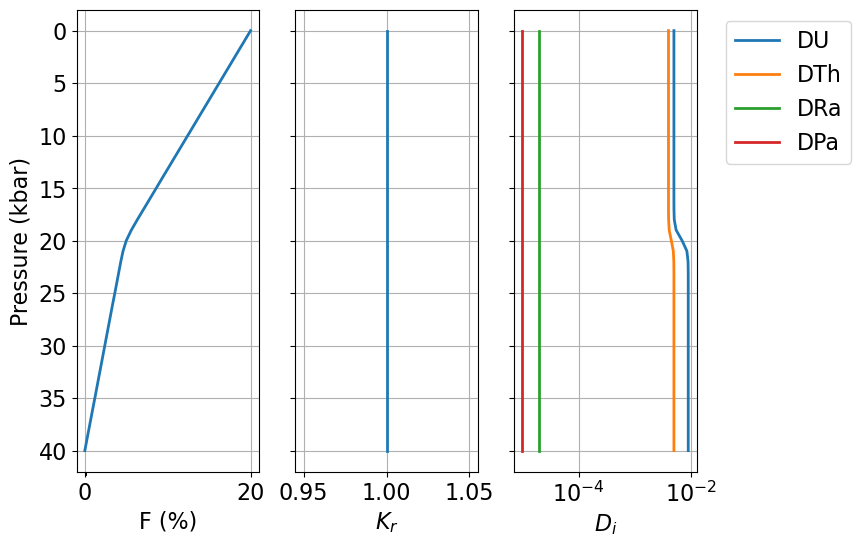

In [4]:
fig = UserCalc.plot_inputs(df)


**Figure 1.** Diagrams showing example input parameters $F$, $K_r$, and $D_i$ as a function of pressure, for the sample input file tested here.

#### Single column equilibrium transport model

In its default mode, `UserCalc` solves the one-dimensional steady-state equilibrium transport model described in @spiegelman2000. Below we will initialize the model, solve for a single column and plot the results.

First we set the physical parameters for the upwelling column and initial conditions:

In [5]:
# Maximum melt porosity:
phi0 = 0.008

# Solid upwelling rate in cm/yr. (to be converted to km/yr. in the driver function):
W0 = 3.

# Permeability exponent:
n = 2.

# Solid and liquid densities in kg/m3:
rho_s = 3300.
rho_f = 2800.

# Initial activity values (default is 1.0):
alpha0_238U = 1.
alpha0_235U = 1.
alpha0_230Th = 1.
alpha0_226Ra = 1.
alpha0_231Pa = 1.
alpha0_all = np.array([alpha0_238U, alpha0_230Th, alpha0_226Ra, alpha0_235U, alpha0_231Pa])


Next, we initialize the default equilibrium model:

In [6]:
us_eq = UserCalc.UserCalc(df)


and run the model for the input code and display the results for the final predicted melt composition in List 1:

In [7]:
df_out_eq = us_eq.solve_all_1D(phi0,n,W0,alpha0_all)
df_out_eq.tail(n=1)


,P,depth,F,phi,(230Th/238U),(226Ra/230Th),(231Pa/235U),Uf_238U,Uf_230Th,Uf_226Ra,Us_238U,Us_230Th,Us_226Ra,Uf_235U,Uf_231Pa,Us_235U,Us_231Pa
40,0.0,0.0,0.2,0.008,1.164941,1.590091,2.10557,-3.121055,-3.556171,-8.613841,-3.121055,-3.556171,-8.613841,-3.121909,-9.179718,-3.121909,-9.179718


**List 1.** Model output results for the equilibrium melting scenario tested above.

The cell below  produces Figure 2, which shows the model results with depth:

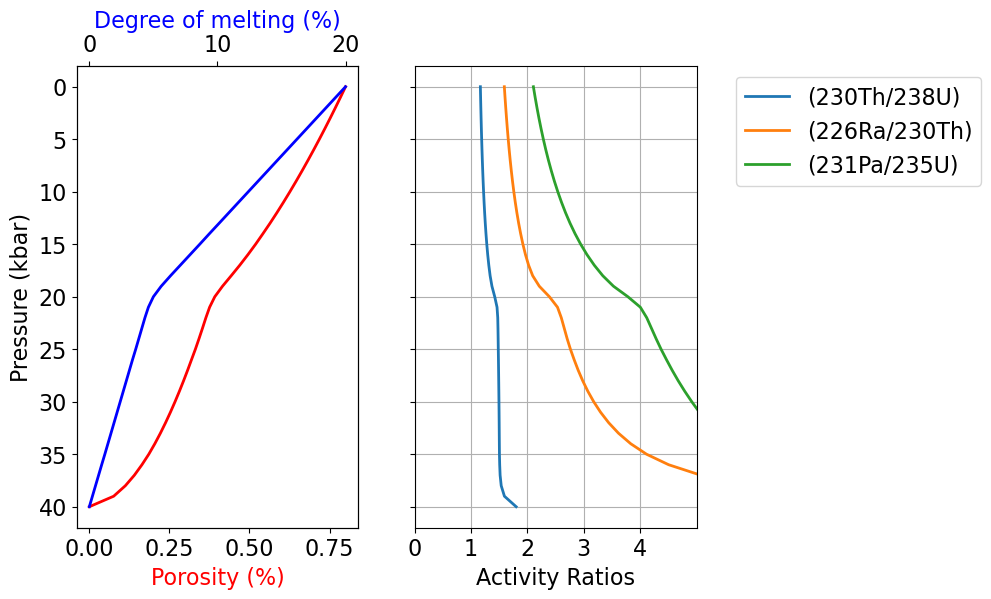

In [8]:
fig = UserCalc.plot_1Dcolumn(df_out_eq)


**Figure 2.** Equilibrium model output results for the degree of melting, residual melt porosity, and activity ratios ($^{230}$Th/$^{238}$U), ($^{226}$Ra/$^{230}$Th), and ($^{231}$Pa/$^{235}$U) as a function of pressure.

#### Single column disequilibrium transport model

For comparison, we can repeat the calculation using the disequilibrium transport model, and compare the results to the equilibrium model. We first initialize a new model with $Da=0$, which will calculate full disequilibrium transport:

In [9]:
us_diseq = UserCalc.UserCalc(df, model=UserCalc.DisequilTransport, Da=0.)


The cells below calculate solutions for this pure disequilibrium scenario, as shown in List 2:

In [10]:
df_out = us_diseq.solve_all_1D(phi0,n,W0,alpha0_all)
df_out.tail(n=1)


,P,depth,F,phi,(230Th/238U),(226Ra/230Th),(231Pa/235U),Uf_238U,Uf_230Th,Uf_226Ra,Us_238U,Us_230Th,Us_226Ra,Uf_235U,Uf_231Pa,Us_235U,Us_231Pa
40,0.0,0.0,0.2,0.008,1.051064,1.001056,1.055728,-3.096781,-3.634765,-9.15517,-39.606679,-39.946072,-42.201858,-3.101977,-9.850142,-39.636411,-45.498608


**List 2.** Model output results for the disequilibrium melting scenario tested above.

Next we compare the results to our equilibrium calculation above:

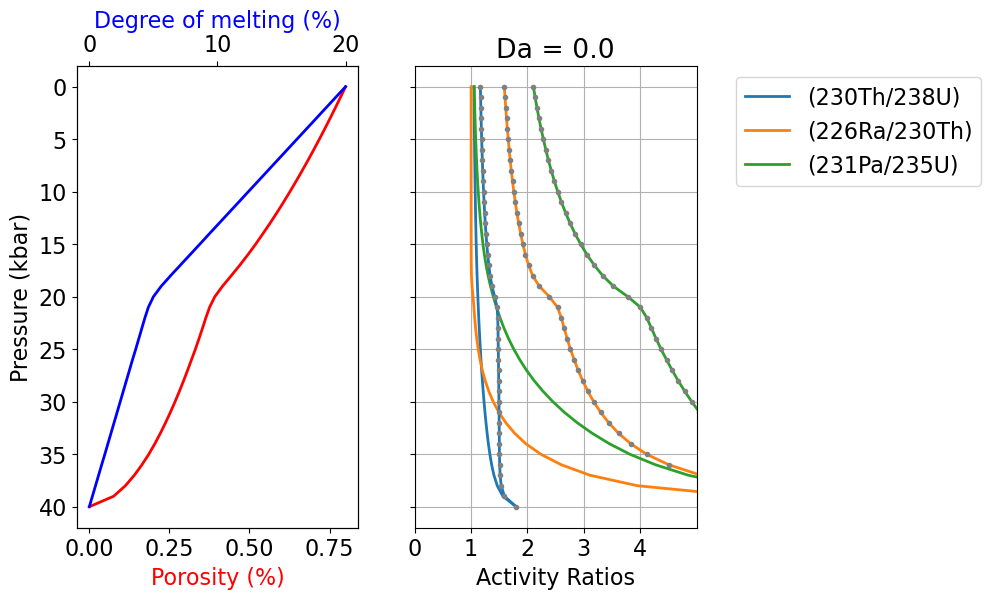

In [11]:
fig, axes = UserCalc.plot_1Dcolumn(df_out)
axes[2].set_prop_cycle(None)
for s in ['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']:
        axes[2].plot(df_out_eq[s],df_out['P'],'-')
        axes[2].plot(df_out_eq[s],df_out['P'],'.',color='grey')

axes[2].set_title('Da = {}'.format(us_diseq.Da))
plt.show()


**Figure 3.** Disequilibrium model output results for the degree of melting, residual melt porosity, and activity ratios ($^{230}$Th/$^{238}$U), ($^{226}$Ra/$^{230}$Th), and ($^{231}$Pa/$^{235}$U) as a function of pressure, for the Damköhler number shown ($Da = 0$). For comparison, the curves with gray dots show solutions for the equilibrium transport model.

The dashed grey curves in Figure 3 illustrate the equilibrium transport solution, which is significantly different from the disequilibrium solution. If we increase the value of $Da$, however, the disequilibrium transport solution should converge towards the equilibrium scenario. To illustrate this, below we calculate the result for $Da=1$:

In [12]:
# Reset the Da number in the reactive transport model to 1:
us_diseq.Da=1.

# Recalculate the model:
df_out = us_diseq.solve_all_1D(phi0,n,W0,alpha0_all)
df_out.tail(n=1)


,P,depth,F,phi,(230Th/238U),(226Ra/230Th),(231Pa/235U),Uf_238U,Uf_230Th,Uf_226Ra,Us_238U,Us_230Th,Us_226Ra,Uf_235U,Uf_231Pa,Us_235U,Us_231Pa
40,0.0,0.0,0.2,0.008,1.158207,1.447593,1.917551,-3.112608,-3.553522,-8.70508,-3.959753,-4.02859,-7.428003,-3.117868,-9.269214,-3.965023,-9.37465


**List 3.** Model output results for the disequilibrium melting scenario tested above, where $Da = 1$.

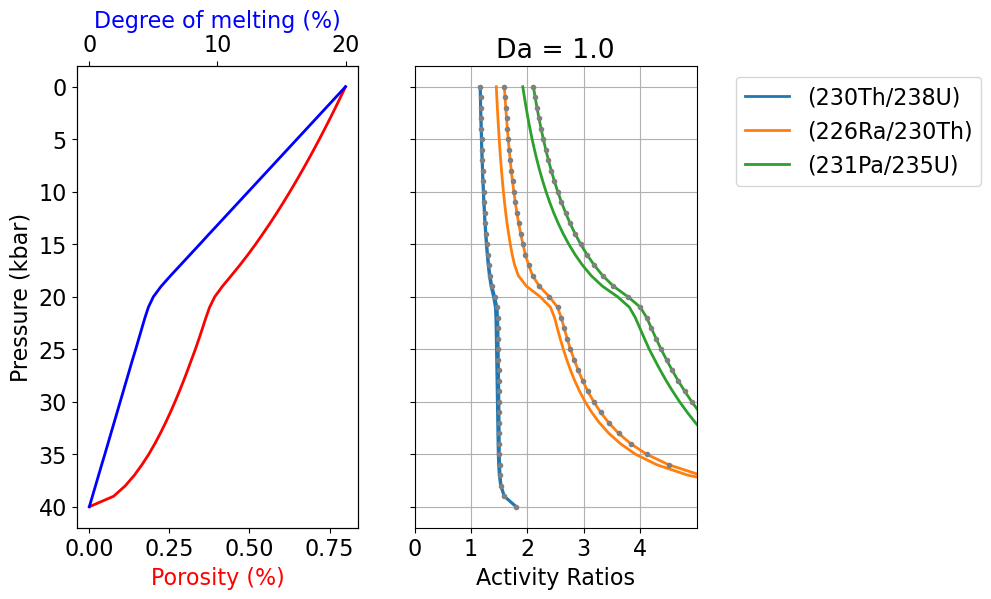

In [13]:
fig, axes = UserCalc.plot_1Dcolumn(df_out)
axes[2].set_prop_cycle(None)
for s in ['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']:
    axes[2].plot(df_out_eq[s],df_out['P'],'-')
    axes[2].plot(df_out_eq[s],df_out['P'],'.',color='grey')
axes[2].set_title('Da = {}'.format(us_diseq.Da))
plt.show()


**Figure 4.** Disequilibrium model output as in  Figure 3, but for $Da = 1$. 

The outcome of the above calculation (Figure 4, List 3) approaches the equilibrium scenario more closely, as predicted. Below is an additional comparison for $Da=10$:

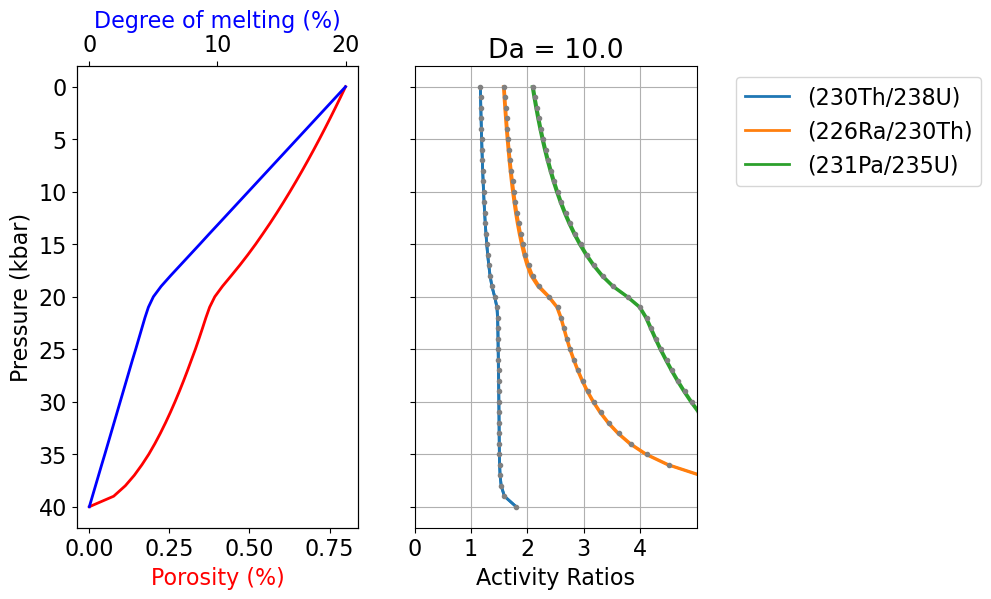

In [14]:
# Reset the Da number in the reactive transport model to 10:
us_diseq.Da=10.

# Recalculate and plot the model:
df_out = us_diseq.solve_all_1D(phi0,n,W0,alpha0_all)

fig, axes = UserCalc.plot_1Dcolumn(df_out)
axes[2].set_prop_cycle(None)
for s in ['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']:
        axes[2].plot(df_out_eq[s],df_out['P'],'-')
        axes[2].plot(df_out_eq[s],df_out['P'],'.',color='grey')

axes[2].set_title('Da = {}'.format(us_diseq.Da))
plt.show()


**Figure 5.** Disequilibrium model output as in  Figure 3, but for $Da = 10$. 

For $Da=10$ (Figure 5), the activity ratios in the melt are indistinguishable from the equilibrium calculation, suggesting that a Damköhler number of 10 is sufficiently high for a melting system to approach chemical equilibrium, and illustrating that the equilibrium model of @spiegelman1993 and @spiegelman2000 is the limiting case for the more general disequilibrium model presented here.  For this problem, equilibrium transport always provides an upper bound on activity ratios.

#### Stable element concentrations
For a stable element, i.e., $\lambda_i = 0$, @spiegelman1993 showed that the equilibrium melting model reduces identically to simple batch melting [@shaw1970], while the disequilibrium model with $Da=0$ is equivalent to true fractional melting. This presents a useful test of the calculator that verifies the program is correctly calculating stable concentrations. To simulate stable element concentrations for U, Th, Ra, and Pa during equilbrium melting, we can use the same input file example as above and simply test the scenario where $\lambda_i$ values are equal to zero.

First, we impose a "stable" condition that changes all decay constants $\lambda_i = 0$:

In [15]:
us_eq = UserCalc.UserCalc(df,stable=True)
df_out_eq = us_eq.solve_all_1D(phi0,n,W0,alpha0_all)
df_out_eq.tail(n=1)


,P,depth,F,phi,(230Th/238U),(226Ra/230Th),(231Pa/235U),Uf_238U,Uf_230Th,Uf_226Ra,Us_238U,Us_230Th,Us_226Ra,Uf_235U,Uf_231Pa,Us_235U,Us_231Pa
40,0.0,0.0,0.2,0.008,1.003937,1.015919,1.019959,-3.120895,-3.704753,-9.21042,-3.120895,-3.704753,-9.21042,-3.120895,-9.903528,-3.120895,-9.903528


**List 4.** Model output results for equilibrium porous flow melting where $\lambda_i = 0$, simulating stable element behavior for U, Th, Ra, and Pa and thus true (instantaneous) batch melting.

For comparison with the results in List 4, we can use the batch melting equation [@shaw1970] to calculate the concentrations of U, Th, Ra, and Pa using the input values in Table 2 for $F(z)$ and $D_i$, where:

$$
\frac{c_i^f}{c_i^0} = \frac{1}{F + D_i(1-F)}
$$ (eq-61)

and determine radionuclide activities for the batch melt using the definition of the activity $a$ for a nuclide $i$:

$$
a_i = \lambda_i c_i^f
$$ (eq-62)

and the initial nuclide activities $a_i^0$, such that:

$$
a_i = \frac{a_i^0}{F + D_i (1 -  F)}
$$ (eq-63)

As the activity ratios in List 5 illustrate, the outcomes of this simple batch melting equation are identical to those produced by the model for equilibrium transport and $\lambda=0$.

In [16]:
df_batch=df[['P','F','DU','DTh','DRa','DPa']]
df_batch['(230Th/238U)'] = (alpha0_all[1]/(df_batch.F-df_batch.F*df_batch.DTh+df_batch.DTh))/(alpha0_all[0]/(df_batch.F-df_batch.F*df_batch.DU+df_batch.DU))
df_batch['(226Ra/230Th)'] = (alpha0_all[2]/(df_batch.F-df_batch.F*df_batch.DRa+df_batch.DRa))/(alpha0_all[1]/(df_batch.F-df_batch.F*df_batch.DTh+df_batch.DTh))
df_batch['(231Pa/235U)'] = (alpha0_all[4]/(df_batch.F-df_batch.F*df_batch.DPa+df_batch.DPa))/(alpha0_all[3]/(df_batch.F-df_batch.F*df_batch.DU+df_batch.DU))

# Extract columns and concatenate dataframes
cols = ['P', 'F', '(230Th/238U)', '(226Ra/230Th)', '(231Pa/235U)']
df_compare = pd.concat([ df_batch[cols].tail(1), df_out_eq[cols].tail(1)])
df_compare['model'] = ['Batch Melting', 'Equilibrium Transport: stable elements']
df_compare.set_index('model')


,P,F,(230Th/238U),(226Ra/230Th),(231Pa/235U)
model,,,,,
Batch Melting,0.0,0.2,1.003937,1.015919,1.019959
Equilibrium Transport: stable elements,0.0,0.2,1.003937,1.015919,1.019959


**List 5.** Simple batch melting calculation results using the methods of @shaw1970, demonstrating identical activity ratio results to those calculated using the equilibrium transport model with $\lambda_i=0$.

Similarly, we can also determine pure disequilibrium melting using the disequilibrium transport model with $\lambda_i=0$. A simple fractional melting problem is easiest to test using constant melt productivity and partitioning behavior, so here we test a simplified, one-layer scenario with constant $dF/dz$ and $D_i$ values:

,P,F,Kr,DU,DTh,DRa,DPa
40,0.0,0.0964,1.0,0.009,0.005,0.00002,0.00001


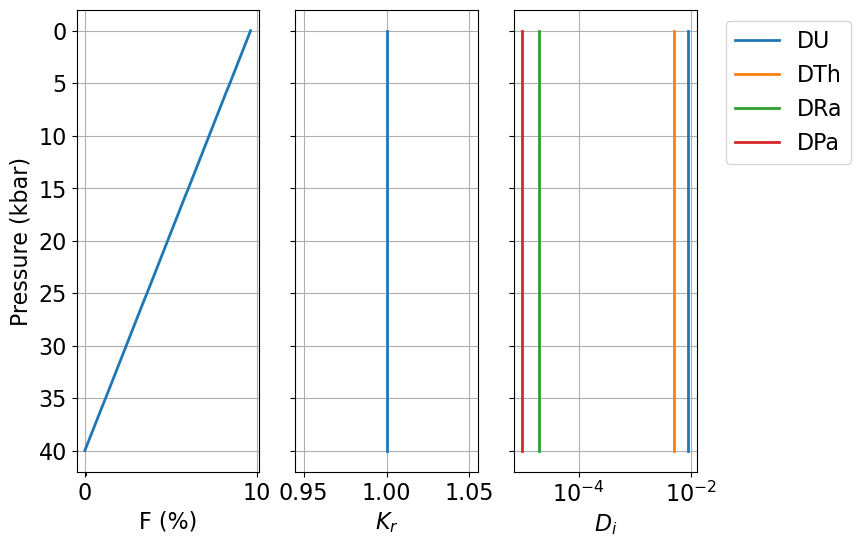

In [17]:
input_file_2 = 'data/simple_sample.csv'
df_test = pd.read_csv(input_file_2,skiprows=1,dtype=float)
UserCalc.plot_inputs(df_test)
df_test.tail(n=1)


**Figure 6.** Simple alternative input file with constant melt productivity and constant solid/melt partitioning, used here to test pure fractional melting outputs.

We note that numerical ordinary differential equation (ODE) solvers may not successfully solve for pure fractional melting with $Da=0$ and stable elements, because the resulting extreme changes in solid concentrations for highly incompatible elements are difficult to resolve using numerical methods. Stable solutions can nonetheless be obtained for very small values of $Da$ that approach $Da=0$, and such solutions still provide a useful test of the disequilibrium transport model. Here we use $Da=10^{-10}$; for such low $Da$ values, the liquid closely approaches the composition of an accumulated fractional melt, and although the liquid and solid outcomes are slightly different from pure fractional melting, the solid is still essentially depleted of all incompatible nuclides.

In [18]:
us_diseq_test = UserCalc.UserCalc(df_test, model=UserCalc.DisequilTransport,stable=True,Da=1.e-10)


In [19]:
df_diseq_test = us_diseq_test.solve_all_1D(phi0,n,W0,alpha0_all)


Similar to our approach for equilibrium and batch melting, we can compare the results of disequilibrium transport for stable elements with pure fractional melting for constant partition coefficients using the definition of aggregated fractional melt concentrations (Figure 7):

$$
\frac{c_i^s}{c_i^{s,0}} = (1 - F)^{1/D_i-1}
$$ (eq-64)

$$
\frac{c_i^f}{c_i^{f,0}} = \frac{D_i}{F} \left(1 - (1 - F)^{1/D_i}\right)
$$ (eq-65)

or in log units:

$$
   U_i^s = (1/D_i-1)\log(1 - F)
$$ (eq-66)

$$
    U_i^f = \log\left(1 - (1 - F)^{1/D_i}\right) + \log\left(\frac{D_i}{F}\right)
$$ (eq-67)

In [20]:
df_frac=df_test[['P','F','DU','DTh','DRa','DPa']]
df_frac['(230Th/238U)'] = ((alpha0_all[1]/df_frac.F)*(1.-(1.-df_frac.F)**(1./df_frac.DTh))) / ((alpha0_all[0]/df_frac.F)*(1.-(1.-df_frac.F)**(1./df_frac.DU)))
df_frac['(226Ra/230Th)'] = ((alpha0_all[2]/df_frac.F)*(1.-(1.-df_frac.F)**(1./df_frac.DRa))) / ((alpha0_all[1]/df_frac.F)*(1.-(1.-df_frac.F)**(1./df_frac.DTh)))
df_frac['(231Pa/235U)'] = ((alpha0_all[4]/df_frac.F)*(1.-(1.-df_frac.F)**(1./df_frac.DPa))) / ((alpha0_all[3]/df_frac.F)*(1.-(1.-df_frac.F)**(1./df_frac.DU)))


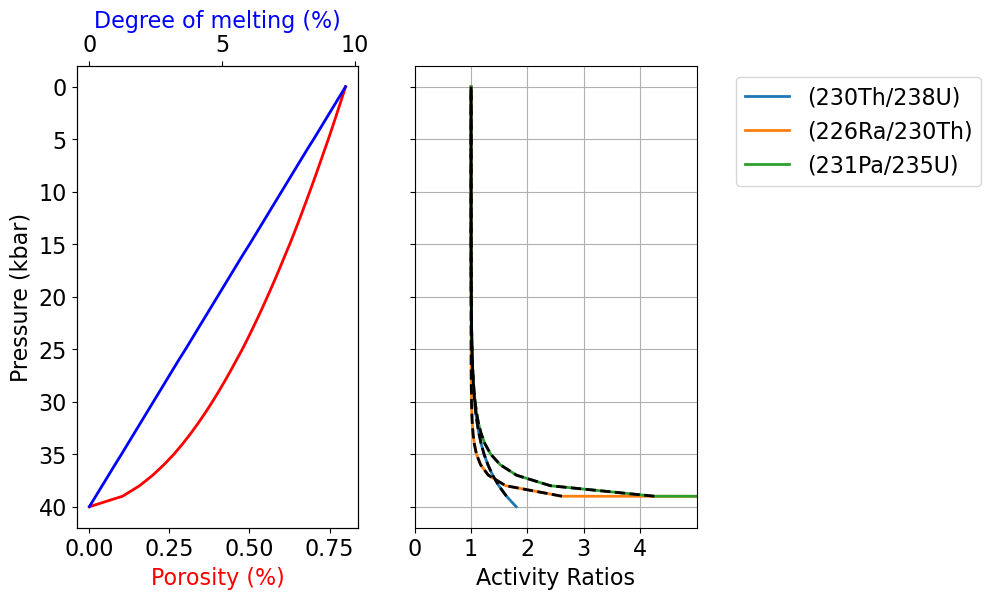

In [21]:
fig, axes = UserCalc.plot_1Dcolumn(df_diseq_test)
for s in ['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']:
        axes[2].plot(df_frac[s],df_diseq_test['P'],'--',color='black')
plt.show()


**Figure 7.** Model output results for the degree of melting, residual melt porosity, and activity ratios ($^{230}$Th/$^{238}$U), ($^{226}$Ra/$^{230}$Th), and ($^{231}$Pa/$^{235}$U) as a function of pressure. The solid curves plot the results of pure fractional melting for stable elements, while the dashed black curves illustrate the outcomes of the disequilibrium transport model with $Da=10^{-10}$ and $\lambda_i=0$. The outcomes of the two methods are indistinguishable.

#### Considering lithospheric transport scenarios

In mantle decompression melting scenarios, melting is expected to cease in the shallow, colder part of the regime where a lithospheric layer is present. The effects of cessation of melting prior to reaching the surface can be envisioned as affecting magma compositions in a number of ways, some of which could be calculated using the models presented here by setting $dF=0$.

There are, however, several limitations when using our transport models to simulate lithospheric melt transport in this way, as the model equations are written to track steady-state decompression and melting. The first limitation is thus the underlying assumption that the solid is migrating and experiences progressive melt depletion in the model, while the solid lithosphere should in fact behave as a rigid matrix that does not experience upwelling. For the disequilibrium transport model with $Da=0$, no chemical reequilibration occurs while $dF=0$, so the lack of solid migration after the cessation of melting does not pose a problem; instead, in the pure disequilibrium transport case, imposing $dF=0$ simply allows for radioactive decay and ingrowth during transport through the lithospheric layer.

The equilibrium transport model, on the other hand, permits full equilibration even if $dF=0$, but the liquid composition does not directly depend on the solid concentration, $c_i^s(z)$, so ongoing chemical reequilibration between the liquid and a modified lithospheric solid could be simulated by modifying the bulk solid/liquid partition coefficients $D_i$. However, the underlying model assumes that the liquid with mass proportion $F_{max}$ reequilibrates with the solid matrix in a steady-state transport regime, at the maximum reference porosity, which may not accurately simulate the transport regime through the fixed lithosphere with no melting. Because it does not directly consider mineral abundances or compositions, the model also does not account for complexities such as low temperature melt-rock reaction or mineral growth.

The case of the scaled disequilibrium transport model with $Da>0$ is the most complex, since the model directly calculates reequilibration of the liquid with a progressively melting solid layer, and thus may not accurately simulate transport through the fixed solid lithosphere. We advise that if the model is used in this way, the results must be interpreted with additional caution.

Finally, calculating a given transport model through the upwelling asthenosphere and into a fixed overlying lithospheric layer neglects an additional, significant limitation: namely that melt-rock interactions, and thus the magma transport style, may be different in the lithosphere than in the melting asthenosphere. As noted above, this could also include low-temperature reactions and the growth of new mineral phases. While it is not possible to change transport models during a single 1D run in the current implementation, one alternative approach is to change the relative permeability, $K_r$, in the lithosphere, in addition to modifying the bulk partition coefficients to reflect lithospheric values. It may also be possible to run a separate, second-stage lithospheric calculation with modified input parameters and revised liquid porosity constraints, but this option is not currently implemented and would require an expansion of the current model.

Despite these caveats, there are some limited scenarios where users may wish to simulate equilibrium or disequilibrium magma transport through a capping layer with constant $dF=0$, constant $\phi = \phi_0$, and revised $D_i$ values for a modified layer mineralogy. The cells below provide options for modifying the existing input data table to impose such a layer. The first cell identifies a final melting pressure $P_{Lithos}$, which is defined by the user in kbar. This value can be set to 0.0 if no lithospheric cap is desired; in the example below, it has been set at 5.0 kbar. There are two overall options for how this final melting pressure could be used to modify the input data. One option (implemented in the Supplementary Materials but not tested here) simply deletes all lines in the input dataframe for depths shallower than $P_{Lithos}$. This is a straightforward option for a one-dimensional column scenario, where melting simply stops at the base of the lithosphere and the composition of the melt product is observed in that position. This is an effective way to limit further chemical interactions after melting has ceased; it fails to account for additional radioactive decay during lithospheric melt transport, but subsequent isotopic decay over a fixed transport time interval could then be calculated using the radioactive decay equations for U-series nuclides.

A second option, shown here to demonstrate outcomes, changes the degree of melting increments ($dF$) to a value of 0 for all depths shallower than $P_{Lithos}$, but allows model calculations to continue at shallower depths. This is preferable if the user aims to track additional radioactive decay and/or chemical exchange after melting has ceased and during subsequent transport through the lithospheric layer, and shall be explored further below.

In [22]:
Plithos = 5.0

Pfinal = df.iloc[(df['P']-Plithos).abs().idxmin()]
F_max = Pfinal[1].tolist()
df.loc[(df['P'] < Plithos),['F']] = F_max


For equilibrium transport scenarios, the cell below offers one possible option for modifying lithospheric solid/melt bulk partition coefficients. We note that if the disequilibrium transport model is used with $Da = 0$ (i.e., pure chemical disequilibrium), this cell is not necessary.

The option demonstrated below imposes new, constant melt-rock partition coefficients during lithospheric transport. These values are assumed to be fixed. An alternative choice, included in the Supplementary Materials, instead fixes the shallower lithospheric solid/melt bulk partition coefficients such that they are equal to $D_i$ values at the depth where melting ceased (i.e., $P_{Lithos}$).

In [23]:
# Define new bulk solid/liquid partition coefficients for the lithospheric layer:
D_U_lith = 0.002
D_Th_lith = 0.006
D_Ra_lith = 0.00002
D_Pa_lith = 0.00001

# Implement the changed values defined above:
df.loc[(df['P'] < Plithos),['DU']] = D_U_lith
df.loc[(df['P'] < Plithos),['DTh']] = D_Th_lith
df.loc[(df['P'] < Plithos),['DRa']] = D_Ra_lith
df.loc[(df['P'] < Plithos),['DPa']] = D_Pa_lith


Following any changes implemented above, the cells below will process and display the refined input data (Figure 8, Table 3).

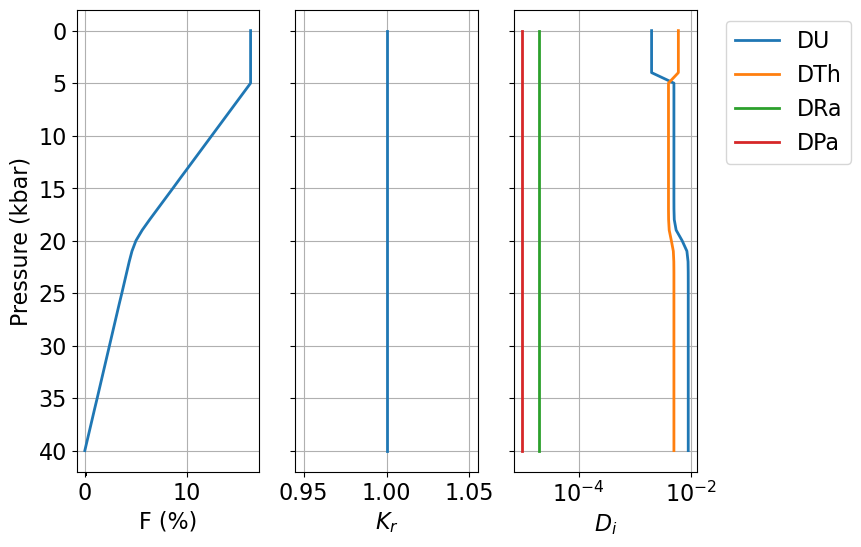

In [24]:
fig=UserCalc.plot_inputs(df)


**Figure 8.** Diagrams showing input parameters $F$, $K_r$, and $D_i$ as a function of pressure, for the example input file and modified lithospheric conditions.

In [25]:
df


,P,F,Kr,DU,DTh,DRa,DPa
0,40.0,0.00000,1.0,0.00900,0.00500,0.00002,0.00001
1,39.0,0.00241,1.0,0.00900,0.00500,0.00002,0.00001
2,38.0,0.00482,1.0,0.00900,0.00500,0.00002,0.00001
3,37.0,0.00723,1.0,0.00900,0.00500,0.00002,0.00001
4,36.0,0.00964,1.0,0.00900,0.00500,0.00002,0.00001
5,35.0,0.01210,1.0,0.00900,0.00500,0.00002,0.00001
6,34.0,0.01450,1.0,0.00900,0.00500,0.00002,0.00001
7,33.0,0.01690,1.0,0.00900,0.00500,0.00002,0.00001
8,32.0,0.01930,1.0,0.00900,0.00500,0.00002,0.00001
9,31.0,0.02170,1.0,0.00900,0.00500,0.00002,0.00001


**Table 3.** Input data table for an example scenario with modified lithospheric transport conditions, showing pressures in kbar ($P$), degree of melting ($F$), permeability coefficient ($K_r$), and bulk solid/melt partition coefficients ($D_i$) for the elements of interest, U, Th, Ra, and Pa.

The cells below will rerun the end member models for the modified lithospheric input file. First, for equilibrium transport:

In [26]:
us_eq = UserCalc.UserCalc(df,stable=False)
df_out_eq = us_eq.solve_all_1D(phi0,n,W0,alpha0_all)


And second, for disequilibrium transport with $Da=0$:

In [27]:
us_diseq = UserCalc.UserCalc(df,model=UserCalc.DisequilTransport,Da=0,stable=False)
df_out_diseq = us_diseq.solve_all_1D(phi0,n,W0,alpha0_all)


List 6 below displays the activity ratios determined for the final melt compositions at the end of the two simulations (i.e., the tops of the one-dimensional melting columns).

In [28]:
df_compare = pd.concat([df_out_eq.tail(n=1), df_out_diseq.tail(n=1)])
df_compare['model'] = ['Equilibrium Transport', 'Disequilbrium Transport']
df_compare.set_index('model')


,P,depth,F,phi,(230Th/238U),(226Ra/230Th),(231Pa/235U),Uf_238U,Uf_230Th,Uf_226Ra,Us_238U,Us_230Th,Us_226Ra,Uf_235U,Uf_231Pa,Us_235U,Us_231Pa
model,,,,,,,,,,,,,,,,,
Equilibrium Transport,0.0,0.0,0.16205,0.008,1.015792,1.894057,1.792975,-2.901132,-3.473250,-8.355990,-2.901132,-3.473250,-8.355990,-2.902001,-9.120520,-2.902001,-9.120520
Disequilbrium Transport,0.0,0.0,0.16205,0.008,1.039707,1.000828,1.034615,-2.890415,-3.439263,-8.959896,-30.344939,-30.346082,-30.346108,-2.891481,-9.659847,-30.359772,-30.359742


**List 6.** Model output results for the disequilibrium ($Da = 0$) melting scenarios tested here, with modified lithospheric input conditions.

The following cell generates Figure 9, which illustrates outcomes with depth for the equilibrium and disequilibrium transport models. The model outcomes for the two transport scenarios are notably different, particularly for the shorter-lived isotopic pairs.

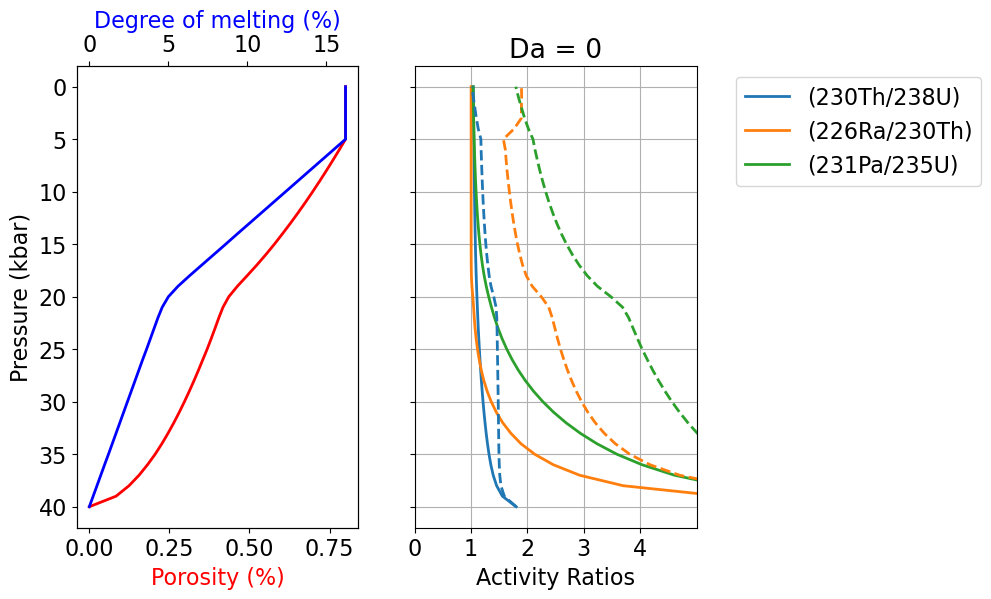

In [29]:
fig, axes = UserCalc.plot_1Dcolumn(df_out_diseq)
axes[2].set_prop_cycle(None)
for s in ['(230Th/238U)','(226Ra/230Th)','(231Pa/235U)']:
        axes[2].plot(df_out_eq[s],df_out['P'],'--')
axes[2].set_title('Da = {}'.format(us_diseq.Da))
plt.show()


**Figure 9.** Comparison of equilibrium (dashed) and disequilibrium ($Da = 0$; solid) transport model output results for the degree of melting, residual melt porosity, and activity ratios ($^{230}$Th/$^{238}$U), ($^{226}$Ra/$^{230}$Th), and ($^{231}$Pa/$^{235}$U) as a function of pressure, for the modified lithospheric transport scenario explored above. Symbols and lines as in Figure 3.

### Batch operations

For many applications, it is preferable to calculate an ensemble of model scenarios over a range of input parameters directly related to questions about the physical constraints on melt generation, such as the maximum residual or reference melt porosity ($\phi_0$) and the solid mantle upwelling rate ($W_0$). The cells below determine a series of one-dimensional column results for the equilibrium transport model and the parameters defined above (that is, the input conditions shown in Table 3 with $n = 2$, $\rho_s = 3300$ kg/m$^3$, and $\rho_f = 2800$ kg/m$^3$), but over a range of values for $\phi_0$ and $W_0$; these results are then shown in a series of figures. The user can select whether to define the specific $\phi_0$ and $W_0$ values as evenly spaced log grid intervals (option 1) or with manually specified values (option 2). As above, all upwelling rates are entered in units of cm/yr. We note that because some of these models tend to be stiff and the Radau ODE solver is relatively computationally expensive, the batch operations below may require a few minutes of computation time for certain scenarios. Here we show the results for the default equilibrium model over a range of selected $\phi_0$ and $W_0$ values of interest:

In [30]:
# Option 1 (evenly spaced log grid intervals):
# phi0 = np.logspace(-3,-2,11)
# W0 = np.logspace(-1,1,11)

# Option 2 (manual selection of values):
phi0 = np.array([0.001, 0.002, 0.005, 0.01])
W0 = np.array([0.5, 1., 2., 5., 10., 20., 50.])

import time
tic = time.perf_counter()
toc = time.perf_counter()

# Calculate the U-238 decay chain grid values:
act = us_eq.solve_grid(phi0, n, W0, us_eq.D_238, us_eq.lambdas_238, us_eq.alphas_238)
Th = act[0]
Ra = act[1]
df = pd.DataFrame(Th)
df = pd.DataFrame(Ra)



W = 0.5 . . . . 
W = 1.0 . . . . 
W = 2.0 . . . . 
W = 5.0 . . . . 
W = 10.0 . . . . 
W = 20.0 . . . . 
W = 50.0 . . . . 

In [31]:
# Calculate the U-235 decay chain grid values:
act_235 = us_eq.solve_grid(phi0, n, W0, us_eq.D_235, us_eq.lambdas_235, us_eq.alphas_235)
Pa = act_235[0]
df = pd.DataFrame(Pa)



W = 0.5 . . . . 
W = 1.0 . . . . 
W = 2.0 . . . . 
W = 5.0 . . . . 
W = 10.0 . . . . 
W = 20.0 . . . . 
W = 50.0 . . . . 

The figures below illustrate the batch model results in a variety of ways. First, each isotopic activity ratio is contoured in $\phi_0$ vs. $W_0$ space (Figure 10), using figures similar to the contour plots of @spiegelman2000. The model outcomes for $W_0$ and $\phi_0$ values are also contoured as mesh "grids" in activity ratio-activity ratio plots (Figure 11). These diagrams show the outcomes for model runs with a given $W_0$ and $\phi_0$ value at each grid intersection point, and each curve shows outcomes for a constant $W_0$ value with variable $\phi_0$ or vice versa, as indicated in the figure legend. Because this particular example shows results for the equilibrium transport model, and the input values for the shallow, spinel peridotite layer of the sample input file define $D_U$ < $D_{Th}$, we note that some of the results exhibit ($^{230}$Th/$^{238}$U) < 1.0 in Figure 11.

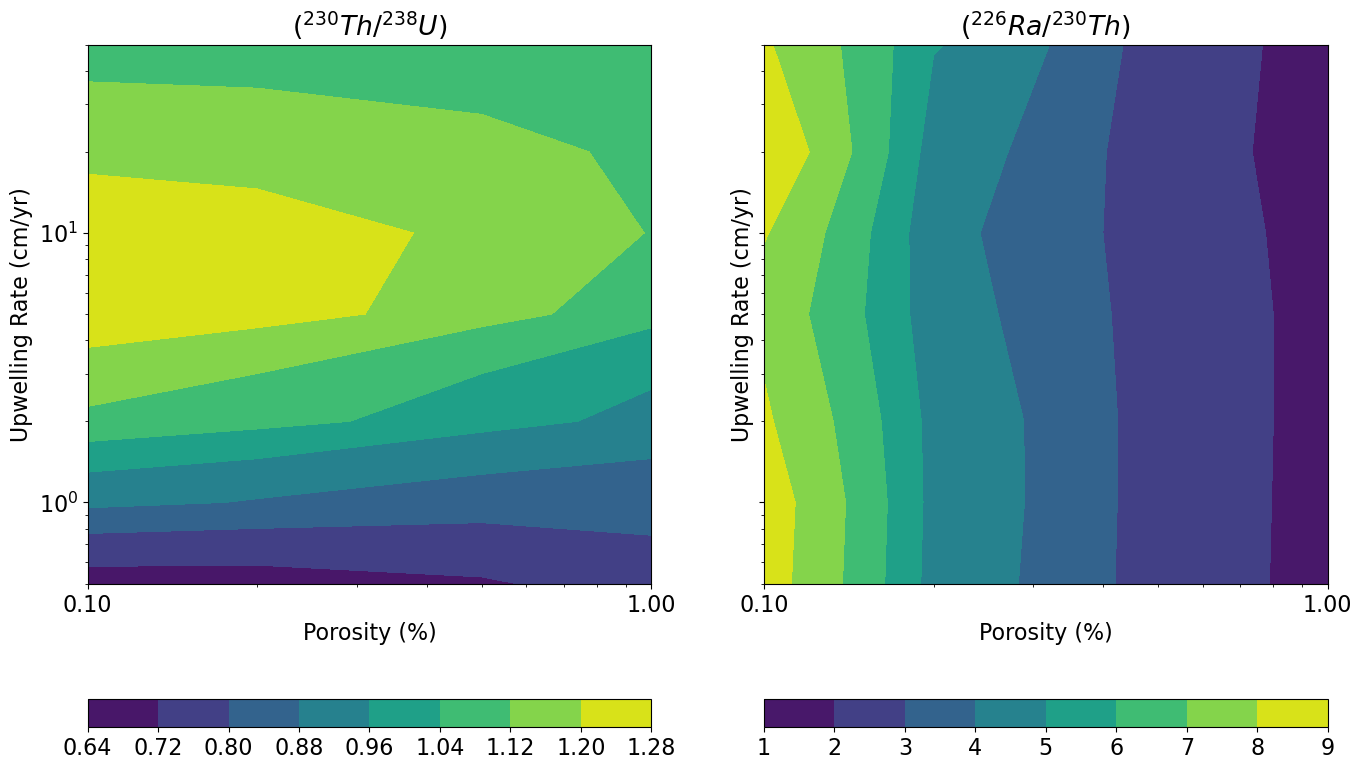

In [32]:
UserCalc.plot_contours(phi0,W0,act, figsize=(8,10))


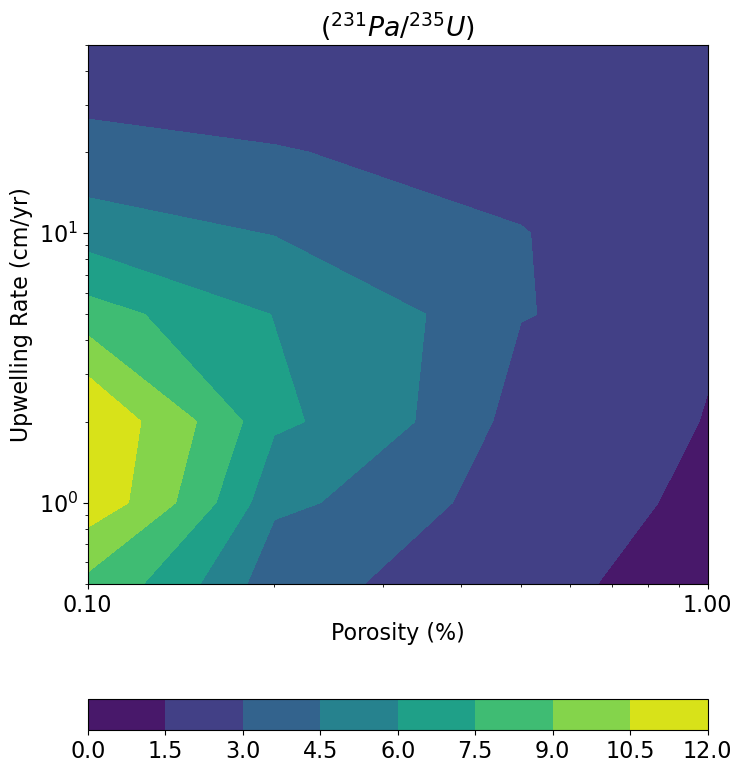

In [33]:
UserCalc.plot_contours(phi0,W0,act_235,figsize=(8,10))


**Figure 10.** Diagrams of upwelling rate ($W_0$) vs. maximum residual melt porosity ($\phi$) showing contoured activity ratios for ($^{230}$Th/$^{238}$U) (top panel), ($^{226}$Ra/$^{230}$Th) (middle panel), and ($^{231}$Pa/$^{235}$U) (bottom panel).

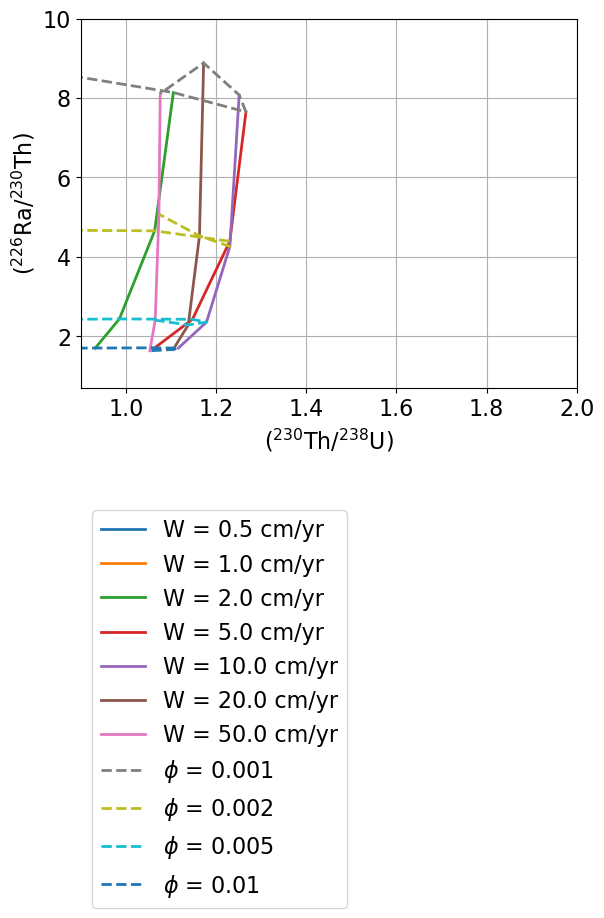

In [34]:
UserCalc.plot_mesh_Ra(Th,Ra,W0,phi0)


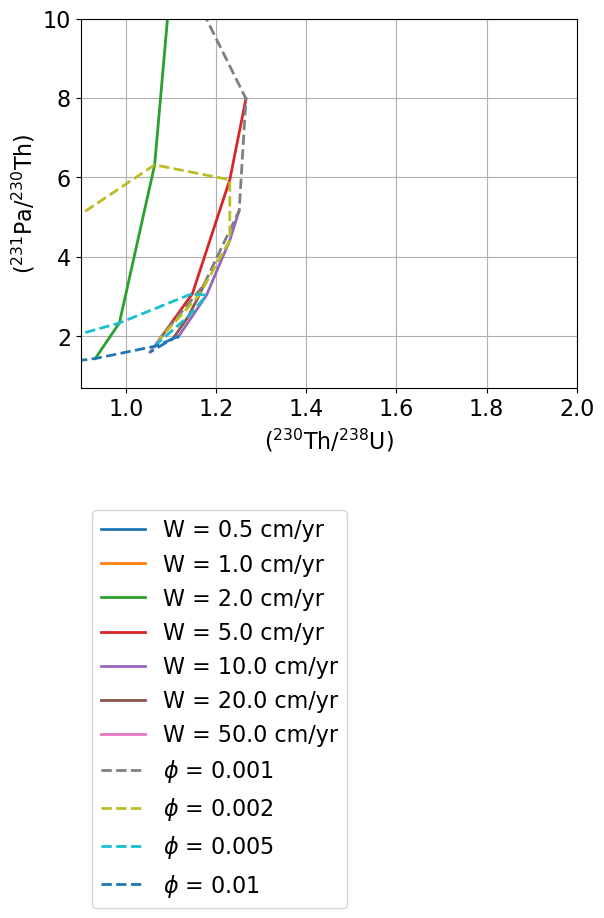

In [35]:
UserCalc.plot_mesh_Pa(Th,Pa,W0,phi0)


**Figure 11.** Diagrams showing ($^{226}$Ra/$^{230}$Th) vs. ($^{230}$Th/$^{238}$U) (top) and ($^{231}$Pa/$^{235}$U) vs. ($^{230}$Th/$^{238}$U) (bottom) for the gridded upwelling rate ($W_0$) and maximum residual porosity ($\phi$) values defined above.

## Summary
We present pyUserCalc, an expanded, publicly available, open-source version of the UserCalc code for determining U-series disequilibria generated in basalts by one-dimensional, decompression partial melting. The model has been developed from conservation of mass equations with two-phase (solid and liquid) porous flow and permeability governed by Darcy's Law. The model reproduces the functionality of the original UserCalc equilibrium porous flow calculator (Spiegelman, 2000) in pure Python code, and implements a new disequilibrium transport model. The disequilibrium transport code includes reactivity rate-limited chemical equilibration calculations controlled by a Damköhler number, $Da$. For stable elements with decay constants equal to zero, the equilibrium model reduces to batch melting and the disequilibrium transport model with $Da$ = 0 to pure fractional melting. The method presented here can be extended to other applications in geochemical porous flow calculations in future work.

We thank three anonymous reviewers for thoughtful feedback that strengthened this manuscript. We also thank K.W.W. Sims and P. Kelemen for initiating early discussions about creating a new porous flow disequilibrium transport calculator back in 2008, and M. Ghiorso for inviting L. Elkins to join the ENKI working group and thereby catalyzing this fresh effort. We further thank the ENKI working group for their helpful suggestions and feedback. L. Elkins received ENKI working group travel assistance that contributed to this research effort, and was supported by NSF award OCE-1658011. M. Spiegelman was supported by the ENKI NSF SI$^2$ award NSF-ACI1550337. This work is dedicated to the memory of our colleague, mentor, and friend Peter Fox, who encouraged our work on this project, expertly handled this manuscript, and spearheaded exciting innovations like publishing executable code in *Earth and Space Science*.

The data set for this research consists of a code package, which is available in several ways: 1) in the supporting information, 2) through a binder container (at https://mybinder.org/v2/gl/ENKI-portal%2FpyUsercalc/master?filepath=pyUserCalc_manuscript.ipynb), and 3) in the ENKI GitLab data repository (https://gitlab.com/ENKI-portal/pyUsercalc), which can also be accessed at the ENKI cloud server (https://server.enki-portal.org/hub/login) with a free GitLab account (register at https://gitlab.com/ENKI-portal). The primary source for pyUserCalc is also hosted in the ENKI GitLab repository, and any future issues and merge requests will be handled there.

How to cite this article: Elkins, L.J., & Spiegelman, M. (2021). pyUserCalc: A revised Jupyter notebook calculator for uranium-series disequilibria in basalts. Earth and Space Science, 8, e2020EA001619. https://doi.org/10.1029/2020EA001619.